In [1]:
import numpy as np
import tensorflow as tf
import librosa
import copy
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import os

Refer to, 
https://musicinformationretrieval.com/basic_feature_extraction.html

In [2]:
wvfileDIR = 'D:/44754/Documents/Data/LJSpeech-1.1/wavs/LJ001-0008.wav'

In [3]:
y, sr = librosa.load(wvfileDIR, 22050) # Sample rate
print(y)
print(y.shape)
print(sr)

[ 2.2583008e-03  1.7700195e-03 -9.1552734e-05 ...  1.8310547e-04
 -1.8310547e-04 -3.3569336e-04]
(39325,)
22050


### Visualize audio

In [4]:
%matplotlib inline
import librosa.display

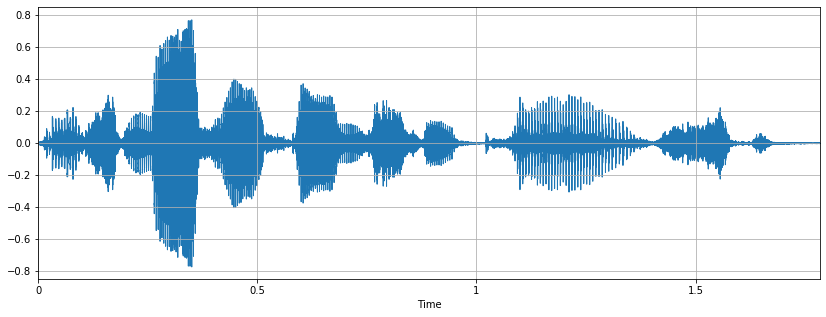

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)
plt.grid(True)

### Spectrogram

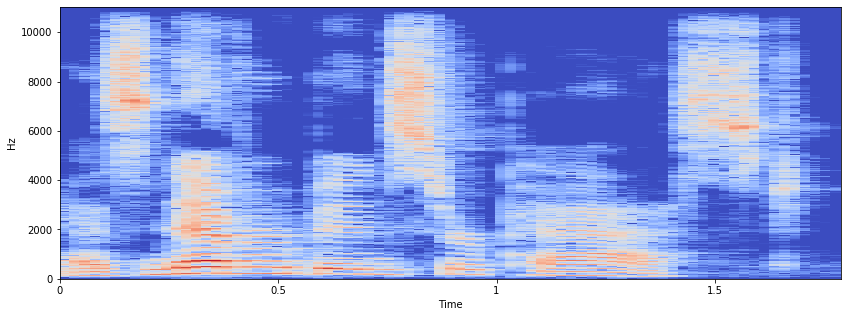

In [6]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [7]:
print(Xdb.shape)

(1025, 77)


### Playing audio

In [8]:
import IPython.display as ipd
ipd.Audio(wvfileDIR) # load a local WAV file

In [9]:
import numpy
sr = 22050 # sample rate
T = 2.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*440*t)                # pure sine wave at 440 Hz

In [10]:
ipd.Audio(x, rate=sr) # load a NumPy array

### Preprocessing

1. Cut the audio by reducing the silent period

In [11]:
yt, index = librosa.effects.trim(y)
print(librosa.get_duration(y), librosa.get_duration(yt))
print(yt.shape)

1.7834467120181405 1.7834467120181405
(39325,)


In [12]:
# signal processing
sr = 22050 # Sample rate.
n_fft = 2048 # fft points (samples)
frame_shift = 0.0125 # seconds
frame_length = 0.05 # seconds
hop_length = int(sr*frame_shift) # samples.
win_length = int(sr*frame_length) # samples.
n_mels = 80 # Number of Mel banks to generate
power = 1.2 # Exponent for amplifying the predicted magnitude
n_iter = 50 # Number of inversion iterations
preemphasis = .97 # or None
max_db = 100
ref_db = 20

In [13]:
# Preemphasis
y = np.append(y[0], y[1:] - preemphasis * y[:-1])
# stft
linear = librosa.stft(y=y,n_fft=n_fft,hop_length=hop_length,
                      win_length=win_length)
# magnitude spectrogram
mag = np.abs(linear)  # (1+n_fft//2, T)
# mel spectrogram
mel_basis = librosa.filters.mel(sr, n_fft, n_mels)  # (n_mels, 1+n_fft//2)
mel = np.dot(mel_basis, mag)  # (n_mels, t)
# to decibel
mel = 20 * np.log10(np.maximum(1e-5, mel))
mag = 20 * np.log10(np.maximum(1e-5, mag))
# normalize
mel = np.clip((mel - ref_db + max_db) / max_db, 1e-8, 1)
mag = np.clip((mag - ref_db + max_db) / max_db, 1e-8, 1)
# Transpose
mel = mel.T.astype(np.float32)  # (T, n_mels)
mag = mag.T.astype(np.float32)  # (T, 1+n_fft//2)

In [14]:
print(y)
print(y[1:])
print(y[:-1])

[ 0.0022583  -0.00042053 -0.00180847 ...  0.00033112 -0.00036072
 -0.00015808]
[-0.00042053 -0.00180847 -0.00265778 ...  0.00033112 -0.00036072
 -0.00015808]
[ 2.2583008e-03 -4.2053219e-04 -1.8084717e-03 ... -4.5776251e-06
  3.3111573e-04 -3.6071776e-04]


In [15]:
print(y.shape)

(39325,)


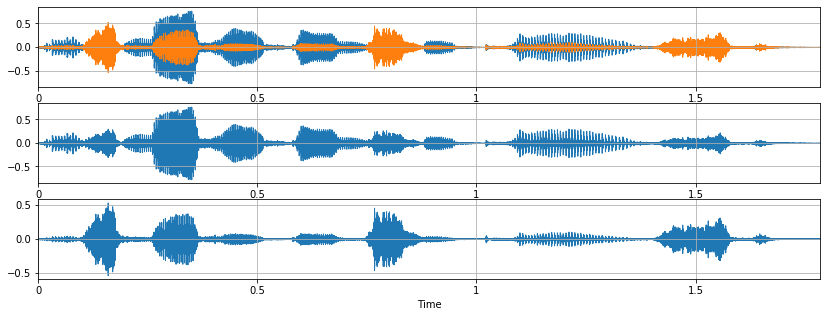

In [16]:
plt.figure(figsize=(14, 5))
plt.subplot(3,1,1)
librosa.display.waveplot(yt, sr=sr)
librosa.display.waveplot(y, sr=sr)
plt.grid(True)
plt.subplot(3,1,2)
librosa.display.waveplot(yt, sr=sr)
plt.grid(True)
plt.subplot(3,1,3)
librosa.display.waveplot(y, sr=sr)
plt.grid(True)

In [17]:
ipd.Audio(y, rate=sr)

In [18]:
mel.shape

(144, 80)

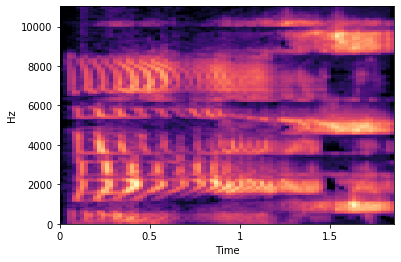

In [19]:
librosa.display.specshow(mel, sr=sr, x_axis='time', y_axis='hz')

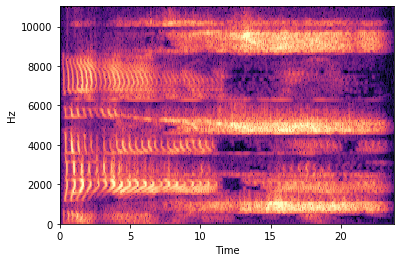

In [20]:
librosa.display.specshow(mag, sr=sr, x_axis='time', y_axis='hz')